# Imports

In [1]:
from nb_utils import set_root
PROJECT_DIR = set_root(2)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters

In [10]:
path_data = PROJECT_DIR / 'data'
path_intermediate = path_data / "02_intermediate"

file_path_tracker = path_intermediate / 'tracker.csv'
file_path_horm = path_intermediate / "data_horm_concat_teste.csv"

# Read

In [11]:
data_tracker = pd.read_csv(file_path_tracker)
data_horm = pd.read_csv(file_path_horm)

In [14]:
data_horm["ID"] = data_horm["ID"].astype(int)

In [17]:
data_horm = data_horm.rename(columns = {"ID": "tracker_id"})

# Head

In [18]:
data_tracker.head()

,tracker_id,class_id,x_min,y_min,x_max,y_max
0,1,0,647.20960,589.07960,685.84890,632.15730
1,2,0,319.81216,370.25058,355.21790,410.91476
2,3,0,1267.44090,452.92240,1309.28820,494.09400
3,4,0,146.33865,707.25916,188.50523,752.01230
4,5,0,873.42303,373.47574,914.81586,412.73980


# Create center point

In [19]:
data_tracker["x_center"] = (data_tracker['x_min'] + data_tracker['x_max']) / 2
data_tracker["y_center"] = (data_tracker['y_min'] + data_tracker['y_max']) / 2

,tracker_id,Serum C14:0,Serum C16:0,Serum C16:1,Serum C18:0,Serum C18:1 n-9,Serum total C18:1,Serum C18:2 n-6,Serum C18:3 n-6,Serum C20:1 n-9,...,HDS,DFI,Seminal AMH,Serum testosterone,Serum oestradiol,Serum SHBG,Serum FSH,Serum LH,Serum inhibin B,Serum AMH
0,1,0.36,29.72,0.64,13.67,9.00,10.90,19.48,0.30,0.16,...,13.0,29.0,64.0,16.8,0.13,15.0,2.3,4.2,289.0,54.0
1,2,0.28,31.22,0.47,11.84,9.02,11.29,20.34,0.22,0.25,...,13.0,57.0,423.0,15.0,0.15,43.0,7.2,2.7,164.0,19.0
2,3,0.36,27.95,0.47,16.57,8.65,10.36,23.75,0.26,0.19,...,11.0,12.0,37.0,8.2,0.18,32.0,4.2,4.8,67.0,47.0
3,4,0.32,28.10,0.64,16.09,8.56,10.13,21.52,0.17,0.11,...,10.0,15.0,257.0,11.2,0.15,11.0,8.5,5.6,132.0,29.0
4,5,0.40,29.94,0.80,14.17,9.47,11.02,22.29,0.38,0.15,...,21.0,13.0,2203.0,11.9,0.14,18.0,2.6,2.1,139.0,68.0


# Join

In [29]:
data_join = data_horm.merge(data_tracker, on="tracker_id", how="inner")

# Viz

In [101]:
data_tracker

,tracker_id,class_id,x_min,y_min,x_max,y_max
0,1,0,647.20960,589.079600,685.848900,632.157300
1,2,0,319.81216,370.250580,355.217900,410.914760
2,3,0,1267.44090,452.922400,1309.288200,494.094000
3,4,0,146.33865,707.259160,188.505230,752.012300
4,5,0,873.42303,373.475740,914.815860,412.739800
...,...,...,...,...,...,...
1821,236,0,150.29099,61.459763,193.075760,103.115036
1822,308,0,0.00000,615.464900,18.856745,652.565600
1823,13,0,0.00000,703.535460,16.553658,738.090900
1824,77,0,976.25310,505.177700,1008.852540,543.480500


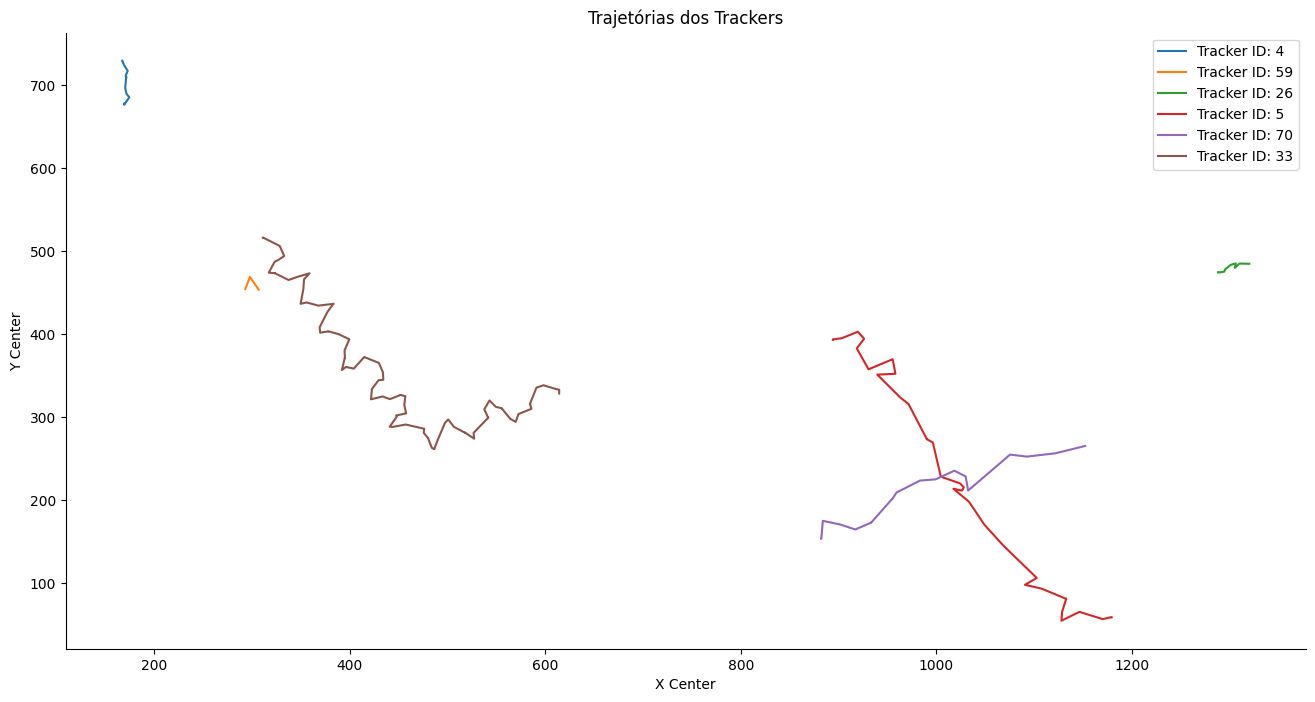

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'data_tracker' seja o DataFrame com os dados
unique_tracker_ids = [4, 59, 26,  5, 70, 33]#data_join['tracker_id'].unique()[:10]  # Seleciona até 10 tracker_ids únicos

# Cria a figura e os eixos
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for id_tracker in unique_tracker_ids:
    data_tracker_id = data_join[data_join['tracker_id'] == id_tracker]
    ax.plot(data_tracker_id['x_center'], data_tracker_id['y_center'], label=f'Tracker ID: {id_tracker}')

# Configurações do gráfico
ax.set_title('Trajetórias dos Trackers')
ax.set_xlabel('X Center')
ax.set_ylabel('Y Center')
ax.spines[["top", "right"]].set_visible(False)
ax.legend()  # Adiciona a legenda
plt.show()

In [75]:
data_menos_movimento = data_join[data_join["tracker_id"] == 8].copy()

data_corr_menos = data_join.corr()[["x_center", "y_center"]].sort_values(["x_center", "y_center"])
data_corr_menos[(data_corr_menos["x_center"] <= -0.4) | (data_corr_menos["x_center"] >= 0.4)].index

Index(['Sperm C18:1 trans', 'Sperm C14:0', 'Sperm C16:1 n-7',
       'Sperm C18:1 n-9', 'Serum LH', 'Serum C18:3 n-6', 'Sperm conc',
       'Sperm C22:6 n-3', 'x_min', 'x_max', 'x_center'],
      dtype='object')

In [100]:
data_join[["tracker_id", 'Sperm C18:1 trans', 'Sperm C14:0', 'Sperm C16:1 n-7',
       'Sperm C18:1 n-9', 'Serum LH', 'Serum C18:3 n-6', 'Sperm conc',
       'Sperm C22:6 n-3']].groupby(["tracker_id"]).mean().loc[[4, 59, 26,  5, 70, 33]]

,Sperm C18:1 trans,Sperm C14:0,Sperm C16:1 n-7,Sperm C18:1 n-9,Serum LH,Serum C18:3 n-6,Sperm conc,Sperm C22:6 n-3
tracker_id,,,,,,,,
4,0.9,1.1,1.0,18.2,5.6,0.17,42.9,14.8
59,1.1,1.3,1.0,11.7,2.5,0.18,50.0,22.2
26,0.8,1.1,1.1,10.1,3.9,0.13,86.8,29.9
5,0.4,1.1,0.9,10.0,2.1,0.38,32.8,26.6
70,0.3,1.0,0.8,8.7,1.4,0.25,119.0,27.1
33,1.4,1.7,1.6,15.5,3.9,0.32,54.9,20.4


In [51]:
menos_movimento = data_join[data_join["tracker_id"] == 8].iloc[:, 1:65].mean()
mais_movimento = data_join[data_join["tracker_id"] == 5].iloc[:, 1:65].mean()

In [57]:
menos_movimento.to_frame("menos").join(mais_movimento.to_frame("mais"))

,menos,mais
Serum C14:0,0.15,0.40
Serum C16:0,28.89,29.94
Serum C16:1,0.61,0.80
Serum C18:0,15.52,14.17
Serum C18:1 n-9,8.50,9.47
...,...,...
Serum SHBG,31.00,18.00
Serum FSH,4.40,2.60
Serum LH,5.50,2.10
Serum inhibin B,160.00,139.00
